In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse

In [2]:
dataname = "CH_data"
alldata = "test"
log = {}

In [3]:
seed_vals = [42, 666, 2023, 1, 3]
list_len = len(seed_vals)
# ファイル名のリスト
filenames = [f"result/seed/{dataname}_seed{seed_val}_predict_{alldata}.txt" for seed_val in seed_vals]

# 各ファイルからデータを読み込み、データフレームに変換
df_list = [pd.read_csv(filename, sep=" ", header=None) for filename in filenames]

#各データフレームの名称と色
labels = [f"seed:{seed_vals}" for seed_vals in seed_vals]
colors = ['red', 'blue', 'green', 'yellow', 'purple']


In [4]:
# 抽出した全要素をまとめるdf
all_df = pd.DataFrame()
for idx in range(len(df_list[0])):
    middle_df = pd.DataFrame()
    for df in df_list:
        middle_df = pd.concat([middle_df, df.iloc[idx]], axis=1)
    #middle_dfのindexとcolumnsを入れ替え
    middle_df = middle_df.T.reset_index(drop=True)
    # print(middle_df)
    #middle_dfをall_dfに追加
    all_df = pd.concat([all_df, middle_df], axis=0)
    #logに残す
    max_value = middle_df[1].max()
    min_value = middle_df[1].min()
    max_index = middle_df[1].idxmax()
    min_index = middle_df[1].idxmin()
    log[f"{middle_df[0][0]}_max:{seed_vals[max_index]}"] = max_value
    log[f"{middle_df[0][0]}_min:{seed_vals[min_index]}"] = min_value
#all_dfのindexをリセット
all_df = all_df.reset_index(drop=True)
all_df

,0,1
0,1.039322,1.146190
1,1.039322,1.172774
2,1.039322,1.137925
3,1.039322,1.140464
4,1.039322,1.114305
...,...,...
1455,5.839173,6.001124
1456,5.839173,5.918313
1457,5.839173,5.972274
1458,5.839173,5.963259


In [5]:
log

{'1.0393222570419312_max:666': 1.172774076461792,
 '1.0393222570419312_min:3': 1.1143051385879517,
 '2.895800828933716_max:42': 2.837268829345703,
 '2.895800828933716_min:1': 2.7182695865631104,
 '3.1271328926086426_max:3': 3.309218168258667,
 '3.1271328926086426_min:42': 3.2047040462493896,
 '1.041856050491333_max:3': 1.2562733888626099,
 '1.041856050491333_min:666': 1.1466187238693235,
 '1.1425262689590454_max:666': 1.1841750144958496,
 '1.1425262689590454_min:3': 1.1300435066223145,
 '1.8147441148757932_max:42': 2.1067256927490234,
 '1.8147441148757932_min:666': 2.0324482917785645,
 '3.0337517261505127_max:1': 2.888275384902954,
 '3.0337517261505127_min:42': 2.5227200984954834,
 '2.5630459785461426_max:1': 2.4748742580413814,
 '2.5630459785461426_min:42': 2.284761667251587,
 '3.929903984069824_max:666': 4.430613040924072,
 '3.929903984069824_min:3': 4.251415252685546,
 '0.7407545447349548_max:42': 0.9573286175727843,
 '0.7407545447349548_min:2023': 0.911441683769226,
 '4.37084245681

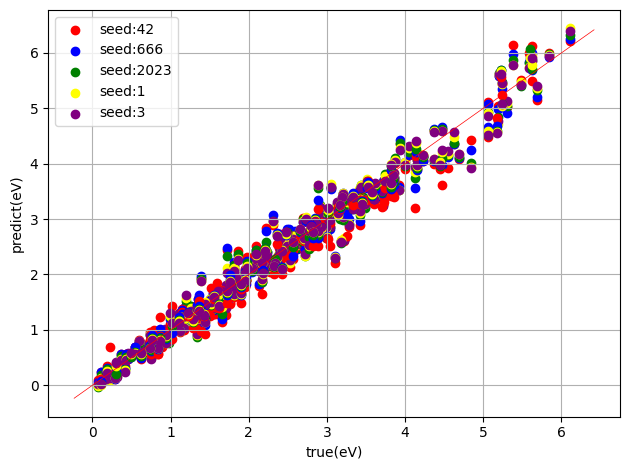

In [8]:
# 散布図のplot
fig1, ax1 = plt.subplots()
# 凡例用のハンドラとラベルを保存するリスト
handlers = []
labels_list = []
for i in range(len(all_df)):
    scatter = ax1.scatter(all_df[0][i], all_df[1][i], color=colors[i%len(labels)], label=labels[i%len(labels)])
    # 同じラベルが既にリストに存在しない場合に、ハンドラとラベルを追加
    if labels[i%len(labels)] not in labels_list:
        handlers.append(scatter)
        labels_list.append(labels[i%len(labels)])
plt.legend(handles=handlers, labels=labels_list)
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
x = np.linspace(*plt.xlim())  # x軸の範囲を取得
plt.plot(x, x, color='red', linewidth=0.5)  # y=xのグラフを描画
plt.grid(True)
plt.tight_layout()
plt.savefig(f'resultplot/seed_scatter.png')
plt.show(block=False)
plt.close()


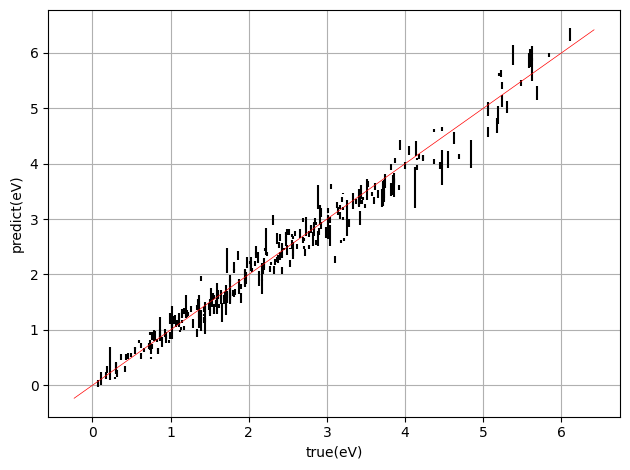

In [7]:
#エラーバーのplot
fig2, ax2 = plt.subplots()
list = []
for i in range(len(all_df)):
    list.append(all_df[1][i])
    if i % len(labels) == len(labels)-1:
        plt.vlines(all_df[0][i], min(list), max(list), color='black')
        list = []
# 軸の名前を設定
plt.xlabel('true(eV)')
plt.ylabel('predict(eV)')
x = np.linspace(*plt.xlim())  # x軸の範囲を取得
plt.plot(x, x, color='red', linewidth=0.5)  # y=xのグラフを描画
plt.grid(True)
plt.tight_layout()
plt.savefig(f"resultplot/seed.png")
plt.show(block=False)
plt.close()